In [63]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [64]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [65]:
dataset = dataset.dropna()

In [66]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


Iteration 1: Cost 586.7507734693877, Weight         [0.10229258], Bias [0.01045777]
Iteration 2: Cost 586.2044101589038, Weight         [0.1045836], Bias [0.01091529]
Iteration 3: Cost 585.658783640394, Weight         [0.10687307], Bias [0.01137254]
Iteration 4: Cost 585.1138929192792, Weight         [0.10916098], Bias [0.01182954]
Iteration 5: Cost 584.5697370023236, Weight         [0.11144735], Bias [0.01228627]
Iteration 6: Cost 584.0263148976314, Weight         [0.11373215], Bias [0.01274275]
Iteration 7: Cost 583.4836256146463, Weight         [0.11601541], Bias [0.01319897]
Iteration 8: Cost 582.9416681641485, Weight         [0.11829712], Bias [0.01365492]
Iteration 9: Cost 582.4004415582542, Weight         [0.12057728], Bias [0.01411062]
Iteration 10: Cost 581.8599448104128, Weight         [0.12285589], Bias [0.01456606]
Iteration 11: Cost 581.3201769354054, Weight         [0.12513296], Bias [0.01502125]
Iteration 12: Cost 580.781136949343, Weight         [0.12740848], Bias [0.01

Iteration 126: Cost 523.862067497822, Weight         [0.37694594], Bias [0.06568763]
Iteration 127: Cost 523.4005047926198, Weight         [0.3790505], Bias [0.06611398]
Iteration 128: Cost 522.9395644089992, Weight         [0.38115364], Bias [0.06654009]
Iteration 129: Cost 522.4792455069029, Weight         [0.38325534], Bias [0.06696597]
Iteration 130: Cost 522.0195472474076, Weight         [0.38535562], Bias [0.0673916]
Iteration 131: Cost 521.560468792722, Weight         [0.38745447], Bias [0.067817]
Iteration 132: Cost 521.102009306186, Weight         [0.3895519], Bias [0.06824216]
Iteration 133: Cost 520.6441679522693, Weight         [0.3916479], Bias [0.06866708]
Iteration 134: Cost 520.1869438965688, Weight         [0.39374248], Bias [0.06909177]
Iteration 135: Cost 519.7303363058079, Weight         [0.39583563], Bias [0.06951621]
Iteration 136: Cost 519.2743443478352, Weight         [0.39792737], Bias [0.06994042]
Iteration 137: Cost 518.8189671916222, Weight         [0.400017

C:\Users\zahra\anaconda3\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


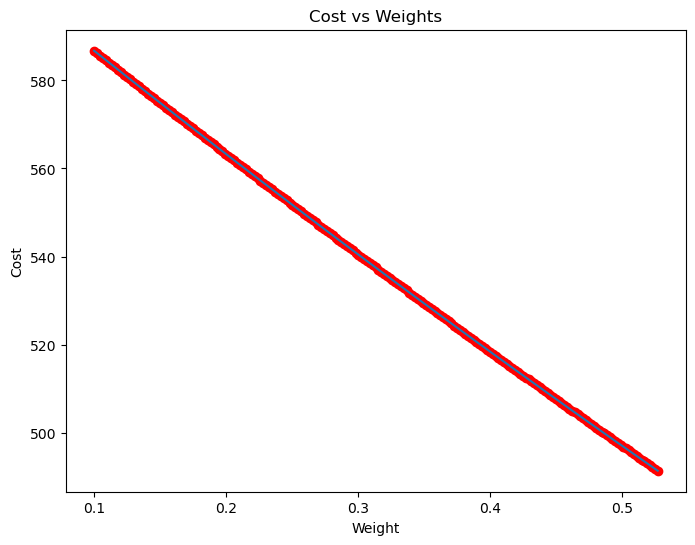

Estimated Weight: [0.5288853]
Estimated Bias: [0.09660288]


In [72]:
# Gradient descent implementation 

import numpy as np
import matplotlib.pyplot as plt


#function calculate lost function 
def mean_squared_error(y_true, y_predicted):
    
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# iterations, learning_rate, stopping_threshold
def gradient_descent(X, y, iterations = 100, learning_rate = 0.00001,
                     stopping_threshold = 1e-5):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(X))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # calculat predictions
        y_predicted = (current_weight * X) + current_bias
         
        # Calculating the cost function 
        current_cost = mean_squared_error(y, y_predicted)
  
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(X* (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 
def main():
    X = dataset.iloc [0: , 1:2]
    #X['0']=1
    X=np.array(X)
    Y=np.array (dataset.iloc [0: , 0:1])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=200)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
    
if __name__=="__main__":
    main()

In [73]:
X = dataset.iloc [0: , 1:2]
X=np.array(X)
X

array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [4],
       [6],
       [6],
       [6],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [6],
       [8],
       [8],
       [8],
       [8],
       [4],
       [4],
       [4],
       [6],
       [6],
       [6],
       [6],
       [6],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [6],
       [4],
       [6],
       [6],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [3],
       [8],
       [8],
       [8],
       [8],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
    

In [61]:
Y=np.array (dataset.iloc [0: , 0:1])
Y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11